In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/train.csv")

## 1. Data Overview & Quality Check

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.loc[df['Age'].argmin()]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

## 2. Univariate Analysis

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

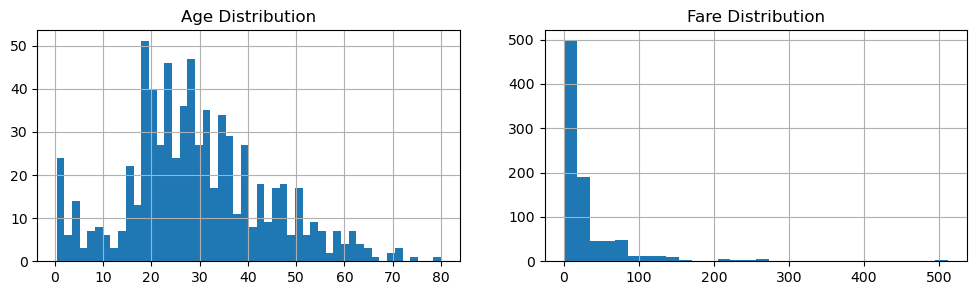

In [78]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df['Age'].hist(bins=50)
plt.title('Age Distribution')

plt.subplot(1,2,2)
df['Fare'].hist(bins=30)
plt.title('Fare Distribution')
plt.show()

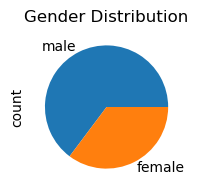

Sex
male      577
female    314
Name: count, dtype: int64


In [96]:
plt.figure(figsize=(2,2))
df['Sex'].value_counts().plot(kind='pie')
plt.title('Gender Distribution')
plt.show()
print(df['Sex'].value_counts())

In [97]:
df['Sex'][df['Survived']==1].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

## 3.Bivariate Analysis

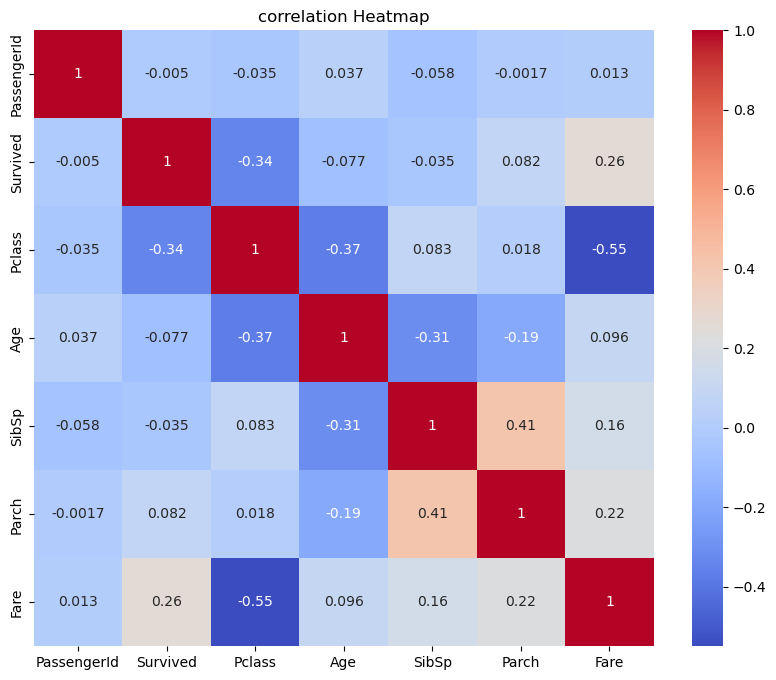

In [101]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()

In [103]:
df.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

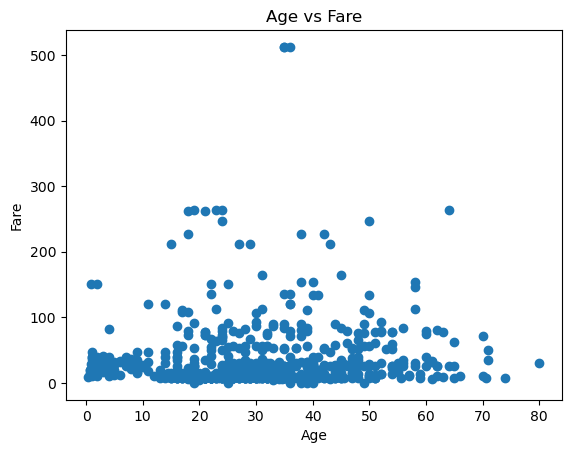

In [104]:
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

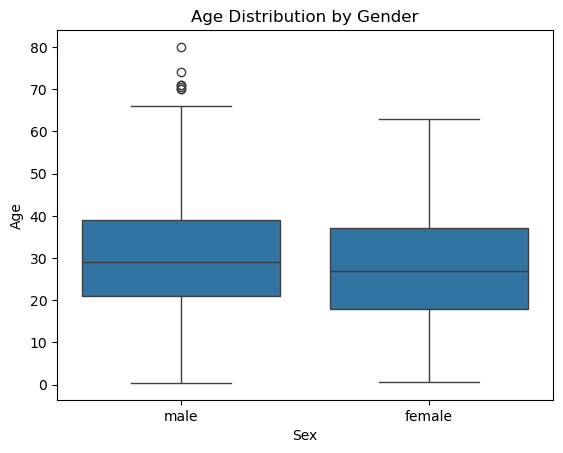

In [105]:
sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.show()

In [106]:
df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [107]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


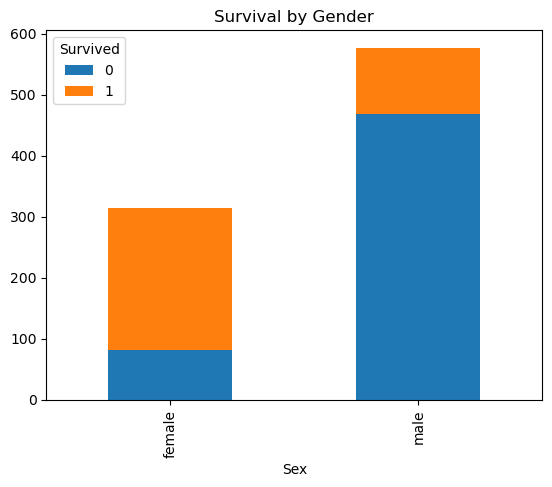

In [109]:
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', stacked=True)
plt.title('Survival by Gender')
plt.show()

## Advanced Analysis

In [112]:
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], 
                        labels=['Child', 'Young Adult', 'Adult', 'Senior'])

In [113]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Young Adult


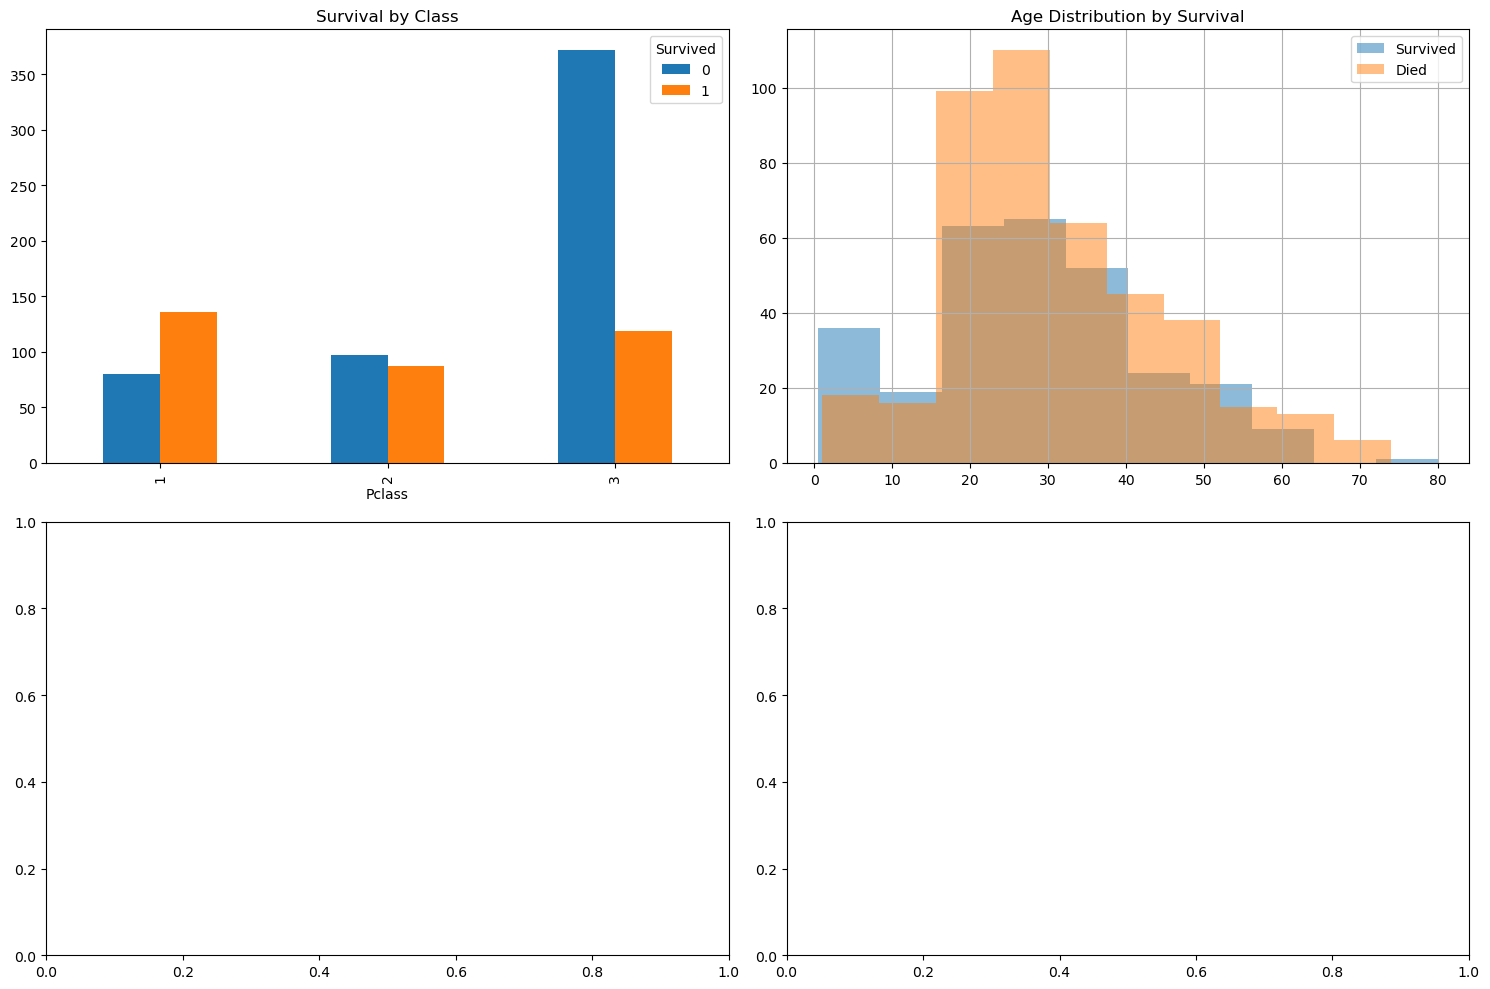

In [138]:
# Multiple plots in one
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Survival by class
# plt.figure(figsize=(12,3))
# plt.subplot(1,2,1)
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Survival by Class')

# Age distribution by survival
# plt.subplot(1,2,2)
df[df['Survived']==1]['Age'].hist(alpha=0.5, ax=axes[0,1], label='Survived')
df[df['Survived']==0]['Age'].hist(alpha=0.5, ax=axes[0,1], label='Died')
axes[0,1].legend()
axes[0,1].set_title('Age Distribution by Survival')

plt.tight_layout()
plt.show()